# CAP 781
# Logistic Regression
## Implementation and performance analysis of KNN, SVM and Logistic Regression

## Author

- **Name**: `Tanzeela Javid Kaloo` | `Assistant Professor`
- **Department**: Systems and Architecture
- **University**: Lovely Professional University
- **Email**: tanzeela.jvd@gmail.com

## What is a Logistic function?

To better understand logistic regression, let's take a look at the logistic function first.

More specifically,  the logistic function $\sigma:\mathbb {R} \rightarrow (0,1)$ is defined as follows:

\begin{equation}
\sigma(z) := \frac{\exp(z)}{1+\exp(z)}=\frac{1}{1+\exp(-z)}.
\nonumber
\end{equation}

The logistic function $\sigma$ takes any real input $z$ and "squeezes" inputs from the real line into $(0,1)$.

The logistic function is also a `sigmoid function`, in other words, an `S-shaped function` as can be seen below:

In [7]:
#create z vector within a specified interval
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(start=-10, stop=10, num=50)

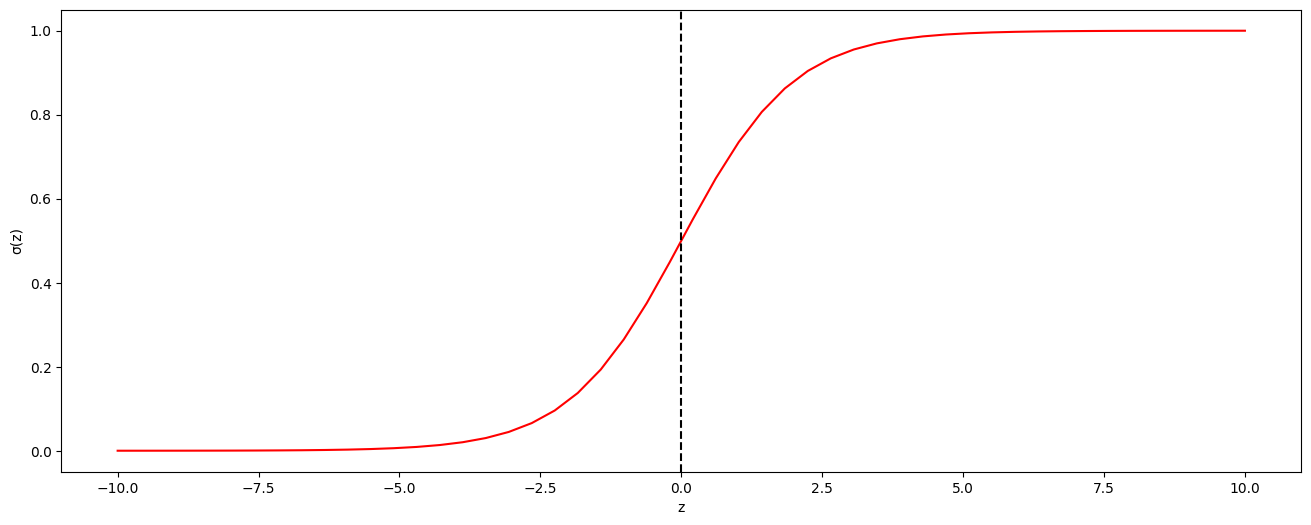

In [8]:
#plot z vs sigmoid(z)
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

plt.plot(z, sigmoid(z), c="r")
plt.axvline(x = 0, color = 'black', label = 'axvline - full height', linestyle='dashed')
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.show();

## Logistic Function Properties

The logistic function $\sigma(z)$ function tends to 1 as $z \to \infty$ such that: 

$$
\lim_{z\to\infty} \sigma(z)=\lim_{z\to\infty} \frac{1}{1+\exp(-z)}=1
$$ 

and it tends to 0 as $z \to -\infty$ such that: 

$$
\lim_{z\to -\infty} \sigma(z)=\lim_{z\to -\infty} \frac{1}{1+\exp(-z)}=0.
$$

The derivative of $\sigma(z)$ has a simple form:

$$
\frac{d\sigma(z)}{dz} = \frac{d}{dz} \bigg(\frac{1}{1+\exp(-z)}\bigg) = \frac{\exp(-z)}{\big(1+\exp(-z)\big)^2}= \bigg(\frac{1}{1+\exp(-z)}\bigg)\bigg(\frac{\exp(-z)}{1+\exp(-z)}\bigg)=\sigma(z)(1-\sigma(z)).
$$

**How can we integrate the logistic function to binary classifacation problems**?

## Logistic Regression

**Given a training dataset** $\mathcal{D} = \{(\mathbf{x}_{1}, y_{1}), (\mathbf{x}_{2}, y_{2}), \ldots, (\mathbf{x}_{n}, y_{n})\}$ of size $n$, for binary classification problems with $y_i \in \{0,1\}$, the `logistic regression` builds a functional form between $Pr(y_{i}=1 \vert \mathbf{x}_{i})$ 
and the `logistic function` of the `linear predictor`, $z_i=\boldsymbol{\theta}^\top \textbf{x}_i=\theta_0+\sum_{j=1}^{d}\theta_jx_{ij}$, which is the linear combination of a set of $d$ features and 
their corresponding coefficients, as follows:


\begin{eqnarray}
\begin{split}
Pr(y_{i}=1\vert \mathbf{x}_{i}) &= \sigma(\boldsymbol{\theta}^\top \textbf{x}_i)=\frac{\exp(\boldsymbol{\theta}^\top \textbf{x}_i)}{1+\exp(\boldsymbol{\theta}^\top \textbf{x}_i)}=\frac{1}{1+\exp(-\boldsymbol{\theta}^\top \textbf{x}_i)},
\nonumber
\end{split} 
\end{eqnarray}

where 


$$
Pr(y_{i}=0\vert \mathbf{x}_{i}) = 1-Pr(y_{i}=1\vert \mathbf{x}_{i})=1-\sigma(\boldsymbol{\theta}^\top \textbf{x}_i)=\frac{1}{1+\exp(\boldsymbol{\theta}^\top \textbf{x}_i)},
$$

where $i=1,\ldots,n$.

For example, assume $X_1 = $ hours of study and $Pr(Y = 1 |x_1)$ probability passing an exam depending on the values of $X_1$, are collected from a number of participants. Then the logistic regression models how probability of passing an exam is associated with numbers of studying.

In [9]:
#define Pr(y=1 given x)
import numpy as np

def predict_prob(x1):
       
    z = (1.2*x1) 
    prob = 1/(1+np.exp(-z))
    
    return prob 

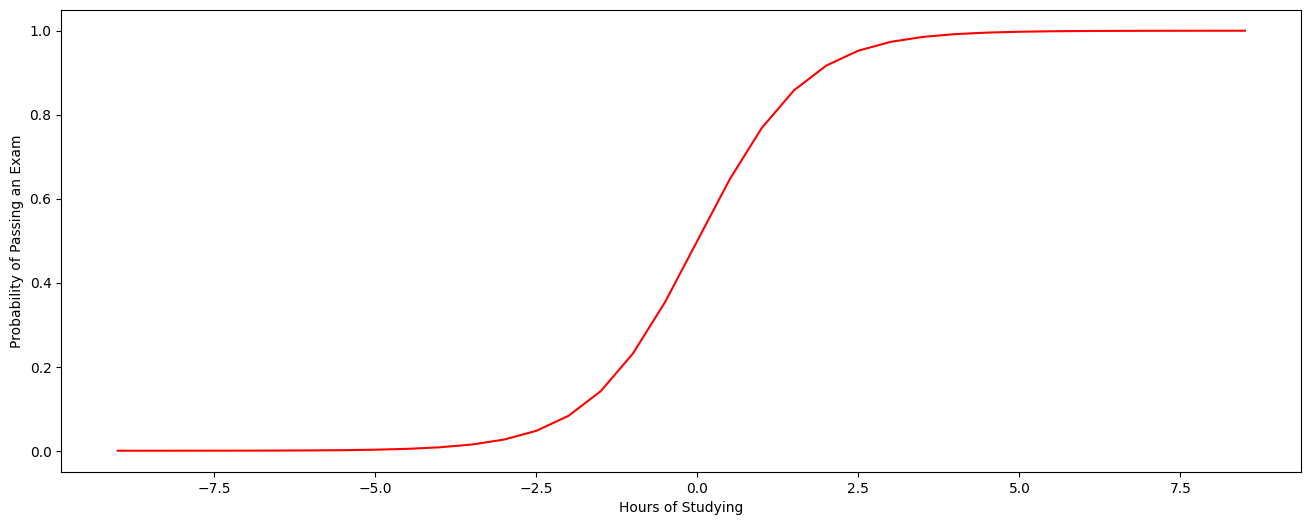

In [10]:
#investigate how the probability of passing an exam is changing with respect to hours of studying
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

x1 = np.arange(-9, 9, 0.5)  #number of hours take negative values here.

plt.plot(x1, predict_prob(x1), c="r")
plt.xlabel("Hours of Studying")
plt.ylabel("Probability of Passing an Exam")
plt.show();

## Decision boundary

In **classification**, classes define a **partition of the feature space**, and the **boundary that separate these regions** is called as the `decision boundary`.

The `decision boundary`  between any two class consists of the set of $\mathbf{x}_{i}$ points ($i=1,\ldots,n$) in which `two classes are equally probable` such that:

\begin{eqnarray} 
Pr(y_{i}=1\vert \mathbf{x}_{i}) &= Pr(y_{i}=0\vert \mathbf{x}_{i}),
\nonumber
\end{eqnarray}

which gives us where `odds ratio` equals 1:

\begin{eqnarray}
\begin{split}
\text{OR}=\frac{Pr(y_{i}=1\vert \mathbf{x}_{i})}{Pr(y_{i}=0\vert \mathbf{x}_{i})}&=1.
\nonumber
\end{split} 
\end{eqnarray}

Equivalently, where the `logarithm of odds ratio` is 0:

\begin{eqnarray}
\begin{split}
\log(\text{OR})=\log\bigg(\frac{Pr(y_{i}=1\vert \mathbf{x}_{i})}{Pr(y_{i}=0\vert \mathbf{x}_{i})}\bigg)=0.
\nonumber
\end{split} 
\end{eqnarray}


Under logistic regression, this is equivalent to:

\begin{eqnarray}
\begin{split}
\log(\text{OR})=\log\bigg(\frac{Pr(y_{i}=1\vert \mathbf{x}_{i})}{Pr(y_{i}=0\vert \mathbf{x}_{i})}\bigg)&=\boldsymbol{\theta}^\top \textbf{x}_i=0.
\nonumber
\end{split} 
\end{eqnarray}


The right-hand side of the above equation is the **decision boundary of logistic regression**, $\boldsymbol{\theta}^\top \textbf{x}_i=\theta_0+\sum_{j=1}^{d}\theta_jx_{ij}=0$, which is a **linear function** in $\mathbf{x}_{i}$.

Here, our aim is to learn the decision boundary, which requires learning $\boldsymbol{\theta}$ based on the training dataset $\mathcal{D} = \{(\mathbf{x}_{1}, y_{1}), (\mathbf{x}_{2}, y_{2}), \ldots, (\mathbf{x}_{n}, y_{n})\}$.

## How to assign a new observation into one of the classes?

Once we learn $\boldsymbol{\theta}$ from the training dataset $\mathcal{D} = \{(\mathbf{x}_{1}, y_{1}), (\mathbf{x}_{2}, y_{2}), \ldots, (\mathbf{x}_{n}, y_{n})\}$, we are able to construct the decision boundary.

Then, we can **assign a new observation** $\mathbf{x}_{n+1}$ into one of the classes $\hat{y}_{n+1} \in \{0,1\}$ **based on** the `estimated decision function` as follows:

\begin{equation}
\hat{y}_{n+1}= 
\begin{cases}
1,  & \text{if} \quad \widehat{\boldsymbol{\theta}}^\top \textbf{x}_{n+1}>0 ,\\
0,  & \text{if} \quad \widehat{\boldsymbol{\theta}}^\top \textbf{x}_{n+1}<0.
\end{cases} \nonumber
\end{equation}

 or equivalently:


\begin{equation}
\hat{y}_{n+1}= 
\begin{cases}
1,  & \text{if} \quad Pr(\hat{y}_{n+1}=1\vert \mathbf{x}_{n+1})= \sigma(\widehat{\boldsymbol{\theta}}^\top \mathbf{x}_{n+1}) >0.5 ,\\
0,  & \text{if} \quad Pr(\hat{y}_{n+1}=1\vert \mathbf{x}_{n+1})= \sigma(\widehat{\boldsymbol{\theta}}^\top \mathbf{x}_{n+1}) <0.5.
\end{cases} \nonumber
\end{equation}

**How to learn parameters, $\boldsymbol{\theta}=(\theta_0$, $\theta_1$, $\ldots$, $\theta_d)$ from training data $\mathcal{D} = \{(\mathbf{x}_{1}, y_{1}), (\mathbf{x}_{2}, y_{2}), \ldots, (\mathbf{x}_{n}, y_{n})\}$ to build up the decision boundary?**

## Logistic Regression Implementation

Logistic regression is implemented in [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class of scikit-learn. The main parameters of the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function are:

      - `penalty='l2'`: Specify the norm of the penalty: 
   
                     - None: no penalty is added;
                     - 'l2': add a L2 penalty term and it is the default choice;
                     - 'l1': add a L1 penalty term.
      - `C=1.0`:  Inverse of regularization strength; must be a positive float.                   

## Re-visit Diabetes Dataset

Diabetes data set contains details of a hospital's patients and the target variable is a binary variable reflecting the fact: whether the patient has diabetes (Yes:1) or not (No:0).

In [13]:
#import the data set

import pandas as pd

diabetes_df = pd.read_csv("dataset/Diabetes.csv")

#there are some inconsistent values in the data set. I removed patients whose bmi and glucose are both zero
diabetes_df = diabetes_df[(diabetes_df.bmi!=0) & (diabetes_df.glucose!=0)]

#Prepare X and y
X = diabetes_df[["bmi","glucose"]]
y = diabetes_df[["diabetes"]]

In [14]:
#first split the data as train and test. Use stratify so that the ratio of 0's to 1's in train data equals to that of in test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1773, stratify = y)

In [15]:
#fit the logistic classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty=None))

lr_pipe.fit(X_train, y_train.diabetes)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty=None))])

In [16]:
#print the learned categories
print(lr_pipe.named_steps['logisticregression'].classes_)

[0 1]


In [17]:
#print intercept parameter estimates
print(lr_pipe.named_steps['logisticregression'].intercept_)

[-0.79750121]


In [18]:
#print slope parameter estimates
#print(lr_pipe.named_steps['logisticregression'].feature_names_in_)
print(lr_pipe.named_steps['logisticregression'].coef_)

[[0.57136154 1.17844075]]


## Uncertainity Estimates

There are two different function in scikit-learn that can be used to obtain uncertainity estimates from classifiers:


- `decision_function`: This value encodes how strongly the model believes a data point to belong to the "positive" class, in this case class 1. Positive values indicate a preference for the positive class, and negative values indicate a preference for the "negative" class, in this case class 0. We can recover the prediction by looking at the sign of the decision function.

- `predict_proba`: The output of `predict_proba` is a probability for each class. The first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class. The class with et least 50% certainity will be the one predicted.
 
Most, but not all, classifiers have at least one of them. 

In [19]:
# Return the decision function score for each Xtest point
lr_pipe.decision_function(X_test.iloc[0:10])

array([-1.73871513e+00,  1.53563457e+00, -2.15978763e+00,  6.94483622e-02,
        2.95215766e-03, -1.13880310e+00, -5.83962493e-01, -2.15253429e+00,
       -8.74867363e-05, -1.26871378e+00])

In [20]:
#Return the probability of being in a specific class for each Xtest point. 
lr_pipe.predict_proba(X_test.iloc[0:10])

array([[0.85052379, 0.14947621],
       [0.17717078, 0.82282922],
       [0.89657986, 0.10342014],
       [0.48264488, 0.51735512],
       [0.49926196, 0.50073804],
       [0.75745982, 0.24254018],
       [0.64197867, 0.35802133],
       [0.89590536, 0.10409464],
       [0.50002187, 0.49997813],
       [0.78052249, 0.21947751]])

In [21]:
#Return the model predicted class labels
lr_pipe.predict(X_test.iloc[0:10])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [22]:
print("Accuracy on train data: %.2f %%" % lr_pipe.score(X_train,y_train))

Accuracy on train data: 0.77 %


In [23]:
print("Accuracy on train data: %.2f %%" % lr_pipe.score(X_test,y_test))

Accuracy on train data: 0.73 %


Our algorithm's predictive accuracy on the test data is 73 %.

## Penalized Logistic Regression

The `augmented objective function` of `penalized logistic regression with L2 norm`:

\begin{eqnarray}
\begin{split}
\underset{\boldsymbol{\theta}}{argmin} \quad -\sum_{i=1}^{n} \Big(y_i \log\big(\sigma(\boldsymbol{\theta}^\top \textbf{x}_i)\big) + (1-y_i)  \log\big(1-\sigma(\boldsymbol{\theta}^\top \textbf{x}_i)\big)\Big) + \frac{1}{C} ||\boldsymbol{\theta}||_2^2.
\end{split}
\end{eqnarray}

The `augmented objective function` of `penalized logistic regression with L1 norm`:

\begin{eqnarray}
\begin{split}
\underset{\boldsymbol{\theta}}{argmin} \quad -\sum_{i=1}^{n} \Big(y_i \log\big(\sigma(\boldsymbol{\theta}^\top \textbf{x}_i)\big) + (1-y_i)  \log\big(1-\sigma(\boldsymbol{\theta}^\top \textbf{x}_i)\big)\Big) + \frac{1}{C} ||\boldsymbol{\theta}||_1.
\end{split}
\end{eqnarray}

where C is the parameter **inverse to alpha**.

Let's fit penalized logistic regression with L1 and L2 norm to the diabetes data to find to the best model. This requires tuning the `hyper-parameter` C.

In [209]:
from sklearn import set_config
set_config(transform_output="pandas")  

#first split the data as train and test. Use stratify so that the ratio of 0's to 1's in train data equals to that of in test data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1773, stratify=y)

In [210]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#The choice of the algorithm depends on the penalty chosen.
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))

#Define parameter range
param_grid = [{'logisticregression__penalty' : ['l1', 'l2'],
               'logisticregression__C' : np.logspace(-4, 4, 20) #Return numbers spaced evenly on a log scale.
               }
              ]  
               
#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=3, shuffle=True, random_state=1773) 

grid_search = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True) 

In [211]:
grid_search.fit(X_train_val, y_train_val.diabetes)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1773, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid=[{'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='accuracy')

In [212]:
#you can investigate validation accuracy in each fold for a given C
#here test score = validation score
#pd.DataFrame(grid_search.cv_results_)

In [213]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'logisticregression__C': 0.012742749857031334, 'logisticregression__penalty': 'l2'}
CV Validation Accuracy: 77.54 %


In [214]:
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.012742749857031334,
                                    solver='liblinear'))])

In [215]:
#Evaluate performance of best logistic classifier on train+val
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val, y_train_val)*100))

Accuracy on train+val data: 78.04 %


In [216]:
#Evaluate final performance of best logistic classifier on test
print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test, y_test)*100))

Accuracy on test data: 72.85 %


Our classifer's predictive accuracy on the test data is 72.85 %.

## Confusion Matrix and Accuracy

We can explicity display how the classifier performed on test data through `confusion matrix`. The confusion matrix involves:

$ $                  | Predicted negative $\hat y=0$  | Predicted positive $\hat y=1$
---------------------|--------------------------------|------------------------------
Negative class $y=0$ | True negative (TN)             | False positive (FP)           
Positive class $y=1$ | False negative (FN)            | True positive (TP)       


- `True Negative (TN):` The actual label and the predicted label are both 0.
- `False Negative (FN):` The actual label is 1, but, the predicted label is 0.
- `False Positive (FP):` The actual label is 0, but, the predicted label is 1.
- `True Positives (TP):` The actual label and the predicted label are both 1.

We can define accuracy as follows:
$$\text{accuracy} = \frac{\text{TN} + \text{TP}}{\text{TN} + \text{FN} + \text{FP} + \text{TP}}$$
This is the number of correction predictions divided by the total number of predictions.

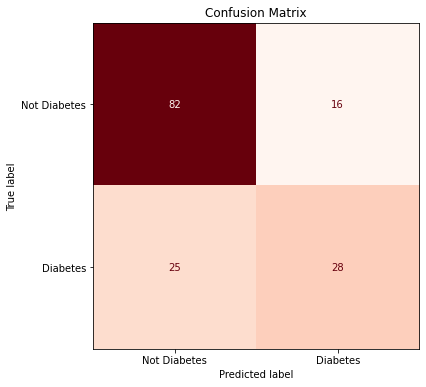

In [217]:
#display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, 
                                           X_test, y_test, 
                                           display_labels=["Not Diabetes","Diabetes"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

## Decision Boundaries 

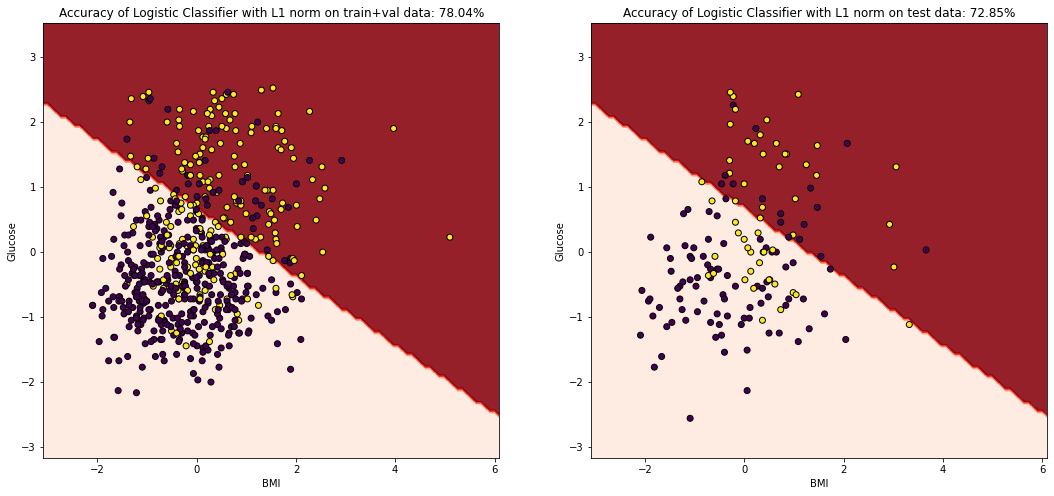

In [218]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]

from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1,2)

#get transformed matrices
X_train_val_scaled = grid_search.best_estimator_[0].fit_transform(X_train_val)
X_test_scaled = grid_search.best_estimator_[0].transform(X_test)
        
#left plot: plot the training+val data on the decisionboundary 
db = DecisionBoundaryDisplay.from_estimator(
grid_search.best_estimator_[1], X_train_val_scaled, response_method="predict", xlabel="BMI", ylabel="Glucose", ax = ax[0], cmap="Reds", alpha=0.9) 

db.ax_.scatter(X_train_val_scaled.bmi, X_train_val_scaled.glucose, c=y_train_val.diabetes, edgecolor="black")
db.ax_.set_title('Accuracy of Logistic Classifier with L1 norm on train+val data: %.2f%%' % (grid_search.score(X_train_val, y_train_val)*100))


#right plot: plot the test data on the decisionboundary 
db = DecisionBoundaryDisplay.from_estimator(
grid_search.best_estimator_[1], X_train_val_scaled, response_method="predict", xlabel="BMI", ylabel="Glucose", ax = ax[1], cmap="Reds", alpha=0.9) 

db.ax_.scatter(X_test_scaled.bmi, X_test_scaled.glucose, c=y_test.diabetes, edgecolor="black")
db.ax_.set_title('Accuracy of Logistic Classifier with L1 norm on test data: %.2f%%' % (grid_search.score(X_test, y_test)*100))

plt.show();

## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/.
- Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: A guide for data scientists. O'Reilly Media, Inc.
- https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/tree/main/notebooks
- https://learn.microsoft.com/en-us/training/modules/train-evaluate-classification-models/3-exercise-model
- https://bait509-ubc.github.io/BAIT509/lectures/lecture9.html

In [219]:
import session_info
session_info.show()